In [ ]:
#installing scanpy library
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=29cee71f8830d0478aec9efef2a5677d85bbd63eef599f3b807ab9008245c92f
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=c0b3c1ef8538e0e19bf4a043859819380213d2d54a816d2a2cf0ba420bb7c3c4
  Stored in directory: /root/.cache/pip/wheels/6a/

In [ ]:
#installing anndata library
!pip install anndata

In [ ]:
#Importing Libraries
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc

In [ ]:
#Importing Libraries
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

In [ ]:
#Loading the data
sp_data_folder = '/content/drive/MyDrive/breastcancer'

In [ ]:
#reading the visium data
adata = sc.read_visium(sp_data_folder, count_file='filtered_feature_bc_matrix.h5', load_images=True)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
#Making adata variable names as unique
adata.var_names_make_unique()

In [ ]:
#Checking the AnnData object
adata

AnnData object with n_obs × n_vars = 2518 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
#Making adata obs names as unique
adata.obs_names_make_unique()

In [ ]:
#adata data shape
adata.X.shape

(2518, 17943)

In [ ]:
#Adata spatial shape checking
adata.obsm['spatial'].shape

(2518, 2)

In [ ]:
#adata obsm checking
adata.obsm

AxisArrays with keys: spatial

In [ ]:
#adata var names checking
adata.var_names

Index(['SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15',
       'AGRN', 'RNF223', 'C1orf159',
       ...
       'SRY', 'ZFY', 'PCDH11Y', 'AMELY', 'TBL1Y', 'TSPY1', 'USP9Y', 'DDX3Y',
       'TMSB4Y', 'KDM5D'],
      dtype='object', length=17943)

In [ ]:
#adata var feature type checking
adata.var.feature_types

SAMD11     Gene Expression
NOC2L      Gene Expression
KLHL17     Gene Expression
PLEKHN1    Gene Expression
PERM1      Gene Expression
                ...       
TSPY1      Gene Expression
USP9Y      Gene Expression
DDX3Y      Gene Expression
TMSB4Y     Gene Expression
KDM5D      Gene Expression
Name: feature_types, Length: 17943, dtype: object

In [ ]:
#Checking the adata obs that loaded from the csv
adata.obs

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13
...                       ...        ...        ...
TTGTTCAGTGTGCTAC-1          1         24         64
TTGTTGTGTGTCAAGA-1          1         31         77
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27

[2518 rows x 3 columns]

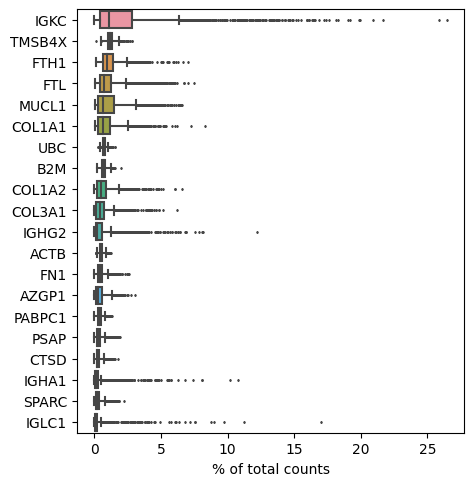

In [ ]:
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.
sc.pl.highest_expr_genes(adata, n_top=20,)

In [ ]:
#Adding a new object to the anndata
adata.obs['thing'] = 'a'

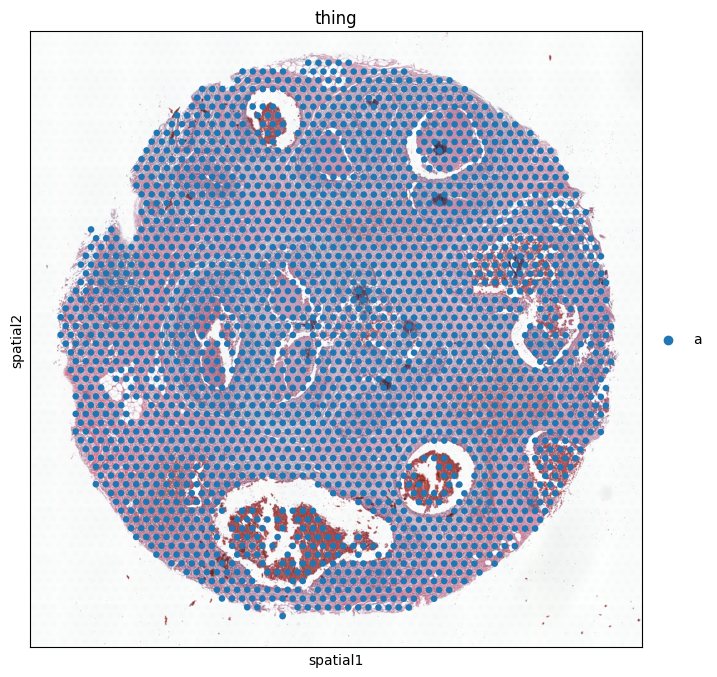

In [ ]:
#Plotting the adata with the new object
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

In [ ]:
#Checking whether the object added in the anndata obs
adata

AnnData object with n_obs × n_vars = 2518 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'thing'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

In [ ]:
#adata var table
adata.var

gene_ids    feature_types  genome
SAMD11   ENSG00000187634  Gene Expression  GRCh38
NOC2L    ENSG00000188976  Gene Expression  GRCh38
KLHL17   ENSG00000187961  Gene Expression  GRCh38
PLEKHN1  ENSG00000187583  Gene Expression  GRCh38
PERM1    ENSG00000187642  Gene Expression  GRCh38
...                  ...              ...     ...
TSPY1    ENSG00000258992  Gene Expression  GRCh38
USP9Y    ENSG00000114374  Gene Expression  GRCh38
DDX3Y    ENSG00000067048  Gene Expression  GRCh38
TMSB4Y   ENSG00000154620  Gene Expression  GRCh38
KDM5D    ENSG00000012817  Gene Expression  GRCh38

[17943 rows x 3 columns]

In [ ]:
#checking adata obs to find out the new object
adata.obs

in_tissue  array_row  array_col thing
AAACAAGTATCTCCCA-1          1         50        102     a
AAACACCAATAACTGC-1          1         59         19     a
AAACAGAGCGACTCCT-1          1         14         94     a
AAACAGCTTTCAGAAG-1          1         43          9     a
AAACAGGGTCTATATT-1          1         47         13     a
...                       ...        ...        ...   ...
TTGTTCAGTGTGCTAC-1          1         24         64     a
TTGTTGTGTGTCAAGA-1          1         31         77     a
TTGTTTCACATCCAGG-1          1         58         42     a
TTGTTTCATTAGTCTA-1          1         60         30     a
TTGTTTCCATACAACT-1          1         45         27     a

[2518 rows x 4 columns]

In [ ]:
# Assembling some information about hemoglobin genes, which are important for quality control.
# With pp.calculate_qc_metrics, we can compute many metrics very efficiently.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))
sc.pp.calculate_qc_metrics(adata, qc_vars=["hb"], inplace=True)

# Mitocondrial Genes are not in the Dataset. So checking the mitocondrial genes skipped in this step
#adata.var["mt"] = adata.var_names.str.startswith("MT-")
#sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# Ribo Genes are not in the Dataset. So skipped in this process
# adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# sc.pp.calculate_qc_metrics(adata, qc_vars=["ribo"], inplace=True)

In [ ]:
#Checking the adata obs with the updated metrics from the hemoglobin genes
adata.obs

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102     a               6327   
AAACACCAATAACTGC-1          1         59         19     a               3184   
AAACAGAGCGACTCCT-1          1         14         94     a               4741   
AAACAGCTTTCAGAAG-1          1         43          9     a               2913   
AAACAGGGTCTATATT-1          1         47         13     a               2572   
...                       ...        ...        ...   ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64     a               4077   
TTGTTGTGTGTCAAGA-1          1         31         77     a               5635   
TTGTTTCACATCCAGG-1          1         58         42     a               1912   
TTGTTTCATTAGTCTA-1          1         60         30     a               3892   
TTGTTTCCATACAACT-1          1         45         27     a               2620   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.752740       21201.0            9.961851   
AAACACCAATAACTGC-1                 8.066208        5672.0            8.643474   
AAACAGAGCGACTCCT-1                 8.464214       13042.0            9.476007   
AAACAGCTTTCAGAAG-1                 7.977282        5527.0            8.617581   
AAACAGGGTCTATATT-1                 7.852828        4591.0            8.432071   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 8.313362        8648.0            9.065199   
TTGTTGTGTGTCAAGA-1                 8.636930       13509.0            9.511186   
TTGTTTCACATCCAGG-1                 7.556428        2994.0            8.004700   
TTGTTTCATTAGTCTA-1                 8.266935        8074.0            8.996528   
TTGTTTCCATACAACT-1                 7.871311        4482.0            8.408048   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   16.871846                    22.428187   
AAACACCAATAACTGC-1                   17.736248                    23.113540   
AAACAGAGCGACTCCT-1                   32.403006                    36.313449   
AAACAGCTTTCAGAAG-1                   23.394246                    29.093541   
AAACAGGGTCTATATT-1                   25.070791                    30.298410   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   20.848751                    25.716929   
TTGTTGTGTGTCAAGA-1                   16.129987                    20.534459   
TTGTTTCACATCCAGG-1                   22.745491                    28.490314   
TTGTTTCATTAGTCTA-1                   19.618529                    25.068120   
TTGTTTCCATACAACT-1                   21.151272                    26.327532   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    29.234470                    41.842366   
AAACACCAATAACTGC-1                    30.483075                    44.340621   
AAACAGAGCGACTCCT-1                    41.558043                    52.162245   
AAACAGCTTTCAGAAG-1                    36.240275                    49.502443   
AAACAGGGTCTATATT-1                    37.638859                    51.600958   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    32.550879                    44.981499   
TTGTTGTGTGTCAAGA-1                    26.441632                    38.300392   
TTGTTTCACATCCAGG-1                    36.272545                    52.839011   
TTGTTTCATTAGTCTA-1                    32.140203                    45.392618   
TTGTTTCCATACAACT-1                    33.623382                    48.728246   

                    total_counts_hb  log1p_total_counts_hb  pct_counts_hb  
AAACAAGTATCTCCCA-1              1.0               0.693147       0.004717  
AAACACCAATAACTGC-1      

<ipython-input-22-6a48e35e4d58>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
<ipython-input-22-6a48e35e4d58>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=

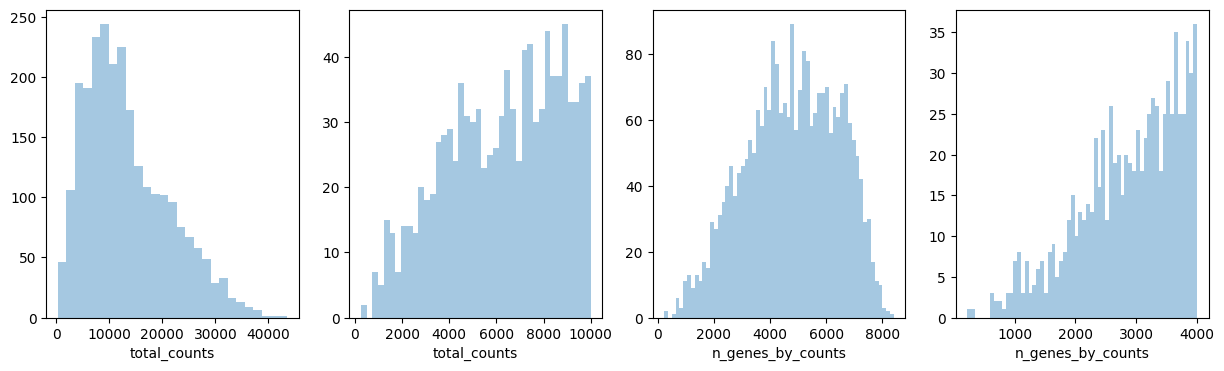

In [ ]:
#Based on the updated genes from hemoglobin genes metrics, four different shaped bar plots here to understand the genes.
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])
plt.show()

<ipython-input-23-a84416835c7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 2000], kde=False, bins=40)


<Axes: xlabel='total_counts'>

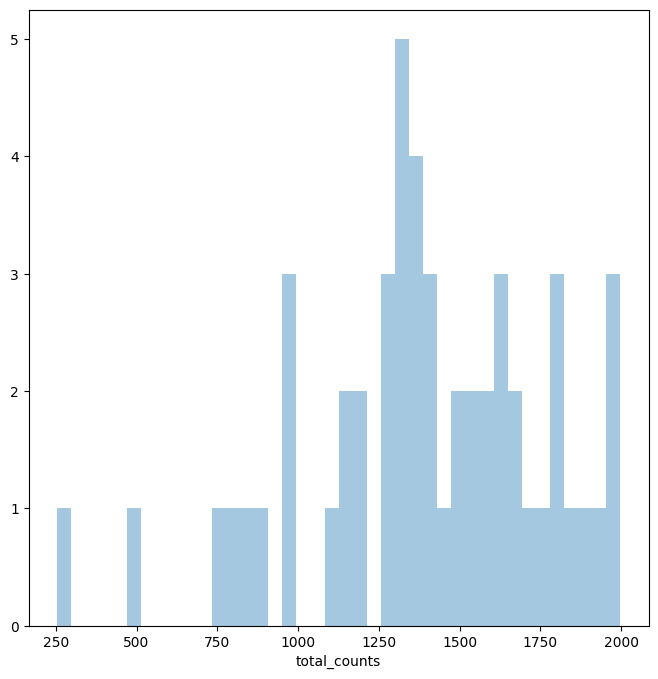

In [ ]:
#Plotting the total_genes less than 2000
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 2000], kde=False, bins=40)

In [ ]:
#filtering adata with min and max
sc.pp.filter_cells(adata, min_counts = 1000)

sc.pp.filter_cells(adata, max_counts=35000)

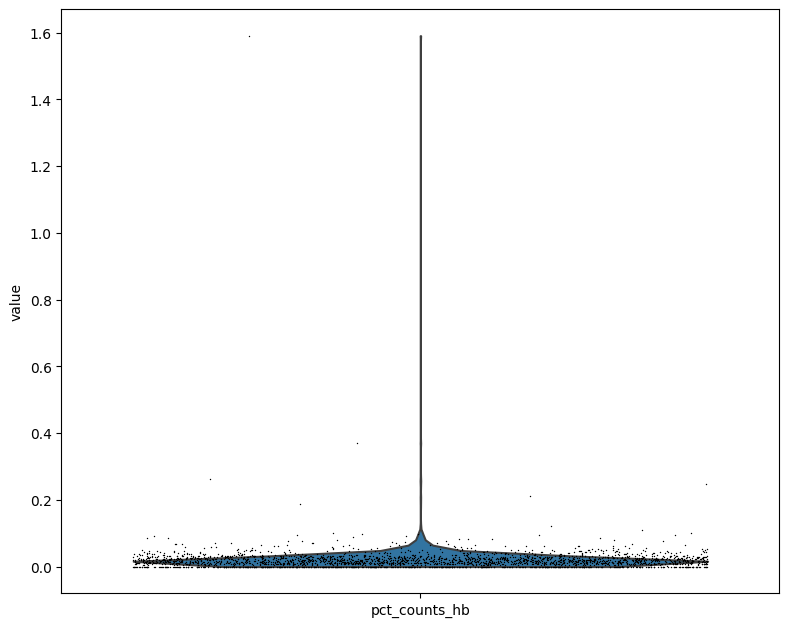

In [ ]:
#Violin plotting of the pct_counts_hb
sc.pl.violin(adata, ['pct_counts_hb'], jitter=0.4)

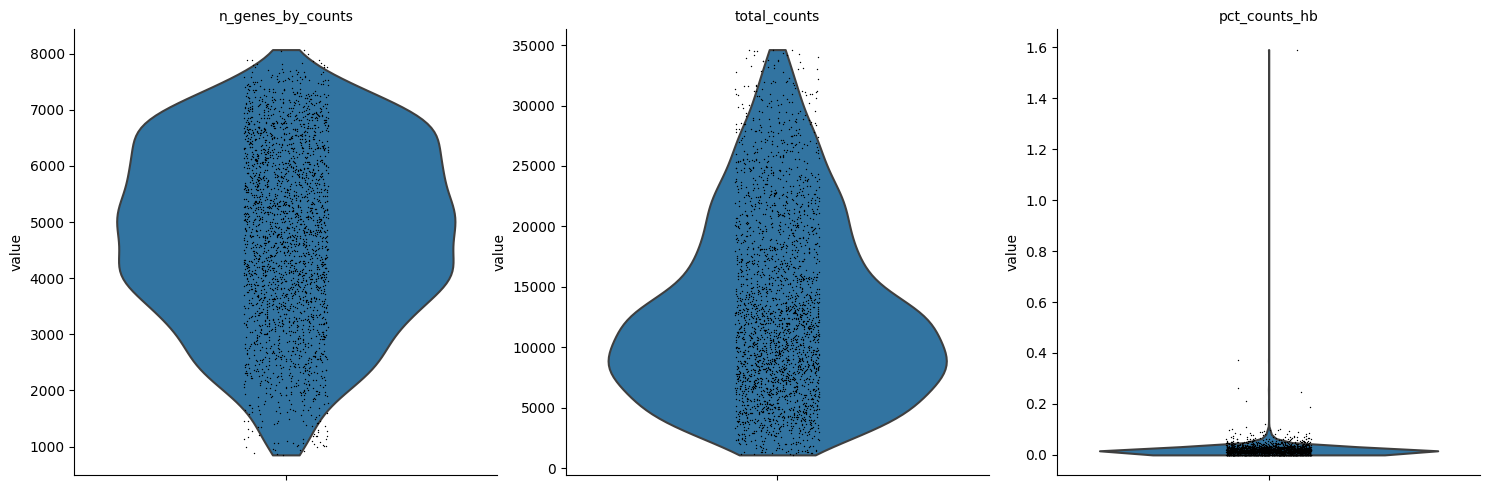

In [ ]:
#Violin plotting of the total genes and pct_counts_hb
sc.pl.violin(
    adata,
    [
     'n_genes_by_counts',
     'total_counts',
     'pct_counts_hb'
     ],
    multi_panel=True
)

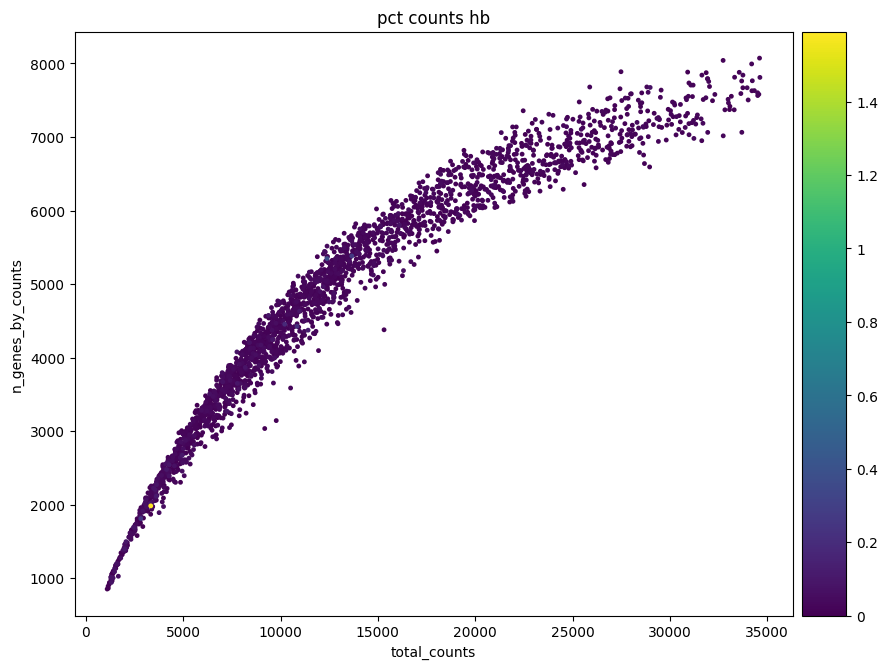

In [ ]:
#Plotting the pct_counts_hb in to see the hemoglobin genes expression or total counts
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_hb")

In [ ]:
#Filtering adata based on the value of the pct_counts_hb >=0.001 and updated the adata with new shaped genes
adata = adata[adata.obs["pct_counts_hb"] >= 0.001]

sc.pp.filter_genes(adata, min_cells=3)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [ ]:
#checking adata objects
adata

AnnData object with n_obs × n_vars = 2007 × 16520
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

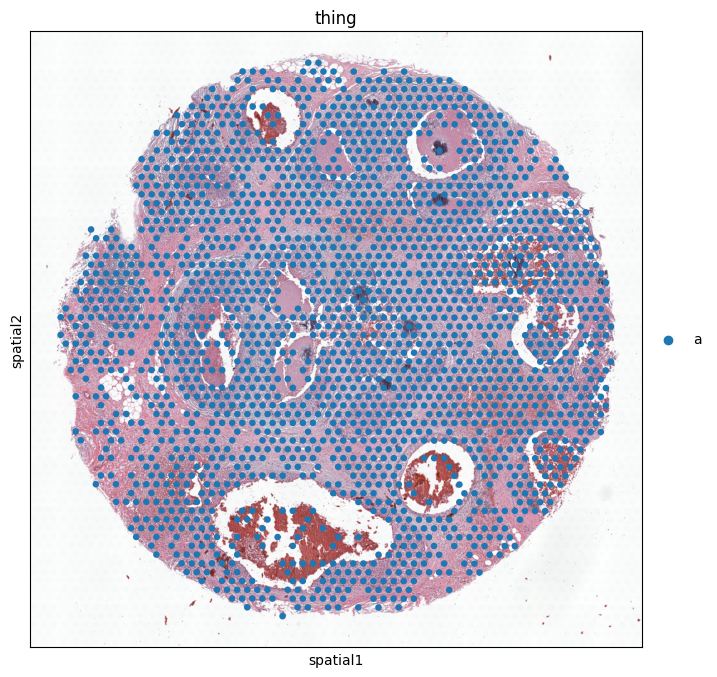

In [ ]:
#Plotting the adata with the thing object to see whether the genes are reduced
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

In [ ]:
#adata var cell counts
adata.var['n_cells_by_counts']

SAMD11      81
NOC2L      927
KLHL17     276
PLEKHN1    251
PERM1        4
          ... 
TSPY1        0
USP9Y        0
DDX3Y        0
TMSB4Y       0
KDM5D        0
Name: n_cells_by_counts, Length: 17943, dtype: int64

In [ ]:
#Using the log1p checking the adata's highly variable genes
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

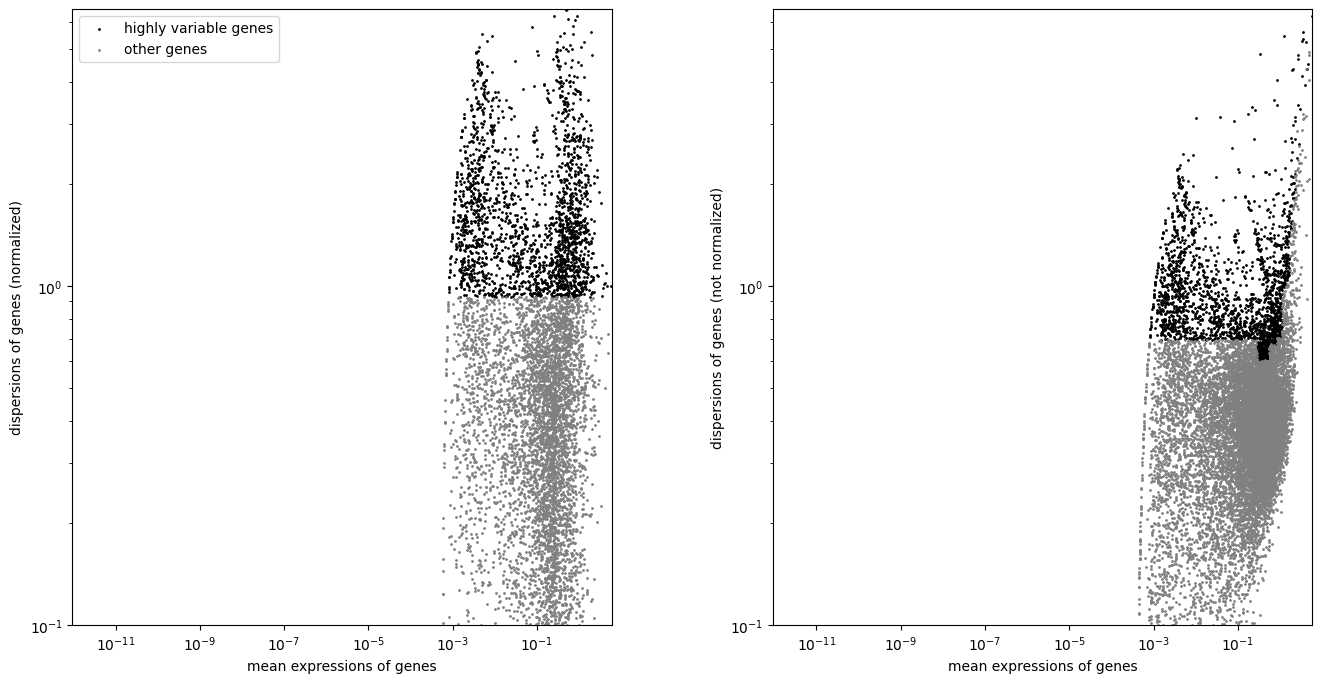

In [ ]:
#Plotthing adata highly variable and other genes
sc.pl.highly_variable_genes(adata, log=True)

#Leiden

In [ ]:
#Installing leiden
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 56.0 MB/s eta 0:00:00


In [ ]:
#Principal Component Analysis of the adata
sc.pp.pca(adata)
#compute the neighborhood graph of cells using the PCA representation of the adata matrix
sc.pp.neighbors(adata)
#embedding the graph in two dimensions using UMAP
sc.tl.umap(adata)
#Plot the clusters, Leiden clustering directly clusters the neighborhood graph of cells.
sc.tl.leiden(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


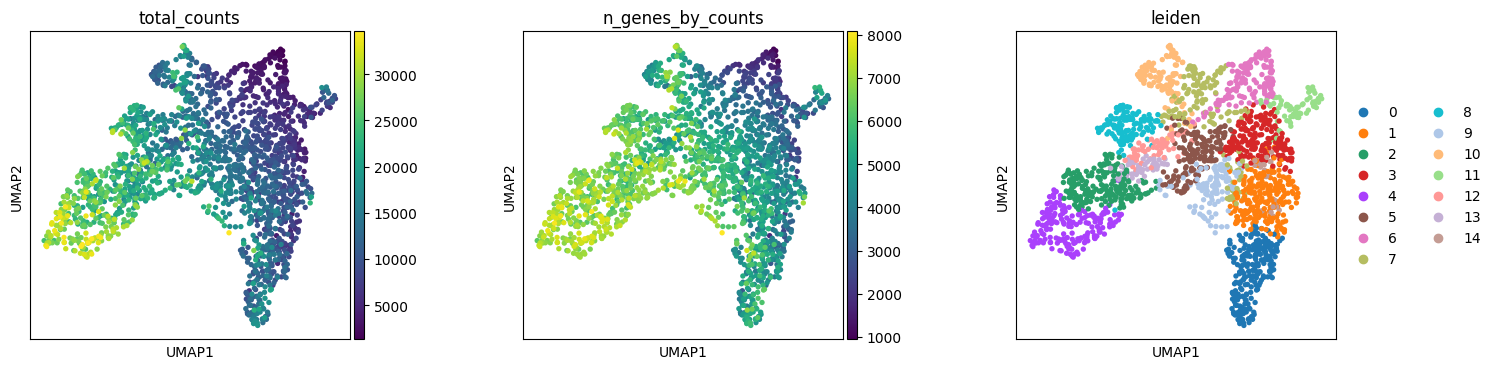

In [ ]:
#Plotting the clusters of Leiden Algorithms
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

In [ ]:
#importing libraries
from matplotlib.pyplot import rc_context

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


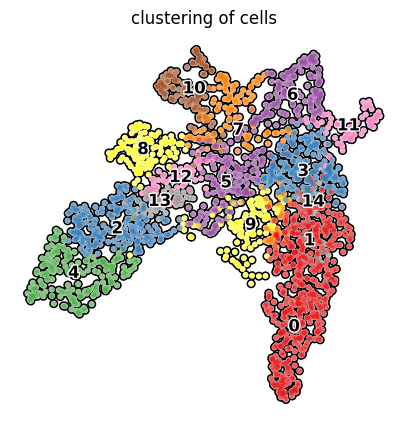

In [ ]:
#With rc_context plotting the clustering of cells using Leiden
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='leiden', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Creating new adata with the leiden clustering for marker genes
adata2 = adata

In [ ]:
#Using the wilcoxon method and leiden finding out the marker genes from adata
sc.tl.rank_genes_groups(adata2, 'leiden', method='wilcoxon')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsLD = adata2.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outLD = np.array([[0,0,0,0,0]])
for group in resultsLD['names'].dtype.names:
    outLD = np.vstack((outLD, np.vstack((resultsLD['names'][group],
                                     resultsLD['scores'][group],
                                     resultsLD['pvals_adj'][group],
                                     resultsLD['logfoldchanges'][group],
                                     np.array([group] * len(resultsLD['names'][group])).astype('object'))).T))



markersLD = pd.DataFrame(outLD[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersLD = markersLD[(markersLD.pval_adj < 0.05) & (abs(markersLD.lfc) > 1)]

In [ ]:
#Printing the marker genes from leiden
markersLD

Gene     scores  pval_adj         lfc cluster
0         IGKC  24.626259       0.0         inf       0
1        IGHG1  20.980598       0.0  104.229111       0
2       JCHAIN  20.100319       0.0   32.762878       0
3        IGHG2  18.798193       0.0  223.877777       0
4        IGHA1  16.942532       0.0  142.702347       0
...        ...        ...       ...         ...     ...
247795   RAB18  -4.269357  0.036301   -4.081401      14
247796    CLTC  -4.322666  0.036301   -4.687908      14
247797    DDR1  -4.392991  0.036301   -5.380779      14
247798  TMEM54   -4.66891  0.016674     -5.1769      14
247799  HPCAL1  -4.967749  0.005595   -3.822193      14

[63546 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using Leiden
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(20000)

0       1         2        3       4       5       6        7  \
0         IGKC    IGKC  LGALS3BP    SFRP4   MUCL1  IGFBP7   CXCL5      FTL   
1        IGHG1  JCHAIN     MUCL1   CCDC80    ASPH   SPARC    PAX8    APOC1   
2       JCHAIN   IGHG1      LY6E     MMP2  CRABP2  COL1A1  FAM13C     CTSL   
3        IGHG2   IGHG2     AZGP1    SFRP2     DBI  COL4A1  IGSF21     APOE   
4        IGHA1     DCN       MDK    FBLN1   ERBB2     LBH     DDN     CTSB   
...        ...     ...       ...      ...     ...     ...     ...      ...   
16515  TACSTD2    ATG5    COL3A1     CTSD  COL6A3   IGHG1  TMSB4X  SCGB1D2   
16516    MED24   NUPR1    COL6A3     OAZ1  COL1A1   IGHG2   UBA52    MUCL1   
16517   CRABP2   MGST1     GPNMB     FTH1  COL3A1  JCHAIN    EEF2  SELENOP   
16518     KRT7    CSTB  SERPINF1  S100A11     DCN    IGKC    ACTB     APOD   
16519  S100A11    FTH1       DCN     CSTB     VIM   IGHG4     UBC     SSR4   

            8        9       10      11       12        13      14  
0        FTH1   IGFBP7      FTL  COL3A1   HILPDA       FGB   IGHG2  
1       DEFB1    SPARC     CTSB  COL1A2  SCGB2A2    PABPC1    CD37  
2      CAPN13      LUM    APOC1  COL1A1  PPP1R1B     EEF1G   DERL3  
3         MGP    TIMP3     APOE     LUM    STAC2      EEF2  IGFLR1  
4         CLU   COL1A1     CTSD   SPARC  SCGB1D2    ARPC1B   SFRP4  
...       ...      ...      ...     ...      ...       ...     ...  
16515  COL6A3    USP53    QRSL1  S100A9      DCN      CD3D   RAB18  
16516    MMP2     FN3K     XBP1   ERBB2   COL3A1  ARHGAP45    CLTC  
16517  COL3A1   LRATD1    CLDN3   AZGP1   COL6A3       C1R    DDR1  
16518    IGKC    STRBP      CLU    FTH1   COL1A2    LRRC15  TMEM54  
16519     DCN  ANGPTL4  SELENOP    XBP1   COL1A1     SFRP4  HPCAL1  

[16520 rows x 15 columns]

#Louvain

In [ ]:
#Installing louvain
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.8 MB/s eta 0:00:00


In [ ]:
#Principal Component Analysis of the adata
sc.pp.pca(adata)
#compute the neighborhood graph of cells using the PCA representation of the adata matrix
sc.pp.neighbors(adata)
#embedding the graph in two dimensions using UMAP
sc.tl.umap(adata)
#Plot the clusters, Louvain clustering directly clusters the neighborhood graph of cells.
sc.tl.louvain(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


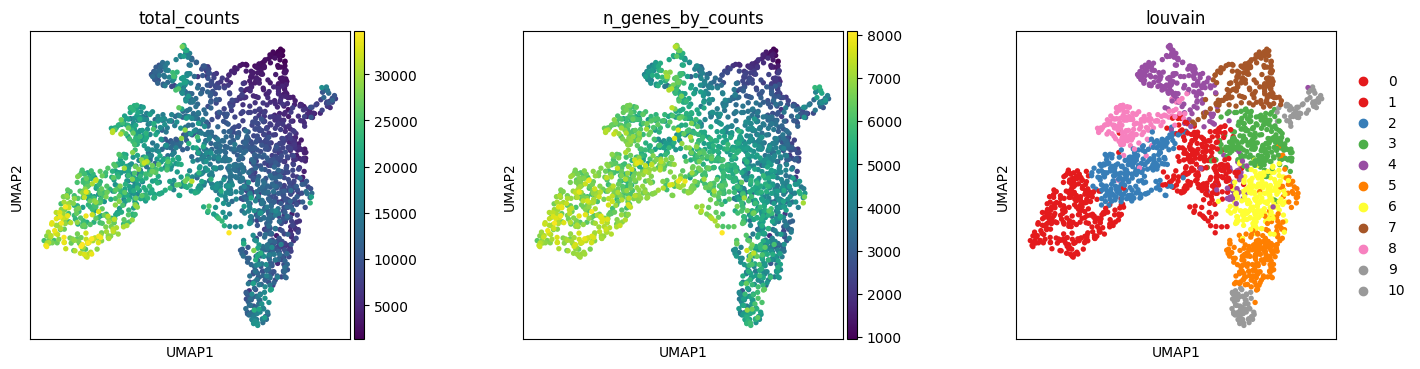

In [ ]:
#Plotting the clusters of Louvain Algorithms
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "louvain"], wspace=0.4)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


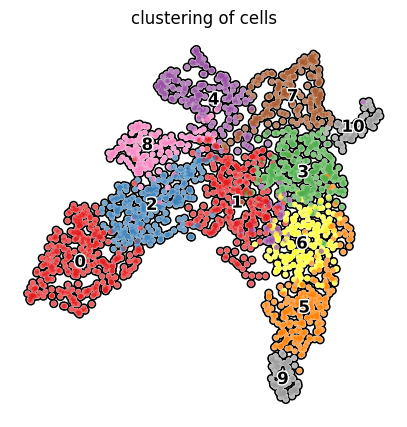

In [ ]:
#With rc_context plotting the clustering of cells using Louvain
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='louvain', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Creating new adata with the louvain clustering for marker genes
adata3=adata

In [ ]:
#Using the wilcoxon method and leiden finding out the marker genes from adata
sc.tl.rank_genes_groups(adata3, 'louvain', method='wilcoxon')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsLO = adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outLO = np.array([[0,0,0,0,0]])
for group in resultsLO['names'].dtype.names:
    outLO = np.vstack((outLO, np.vstack((resultsLO['names'][group],
                                     resultsLO['scores'][group],
                                     resultsLO['pvals_adj'][group],
                                     resultsLO['logfoldchanges'][group],
                                     np.array([group] * len(resultsLO['names'][group])).astype('object'))).T))



markersLO = pd.DataFrame(outLO[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersLO = markersLO[(markersLO.pval_adj < 0.05) & (abs(markersLO.lfc) > 1)]

In [ ]:
#Printing the marker genes from louvain
markersLO

Gene     scores pval_adj         lfc cluster
0        MUCL1  26.052794      0.0         inf       0
1       CRABP2  25.379749      0.0    35.13982       0
2          DBI  25.198515      0.0   45.073421       0
3         ASPH  25.189528      0.0   44.323891       0
4        ERBB2  25.181782      0.0   92.093773       0
...        ...        ...      ...         ...     ...
181715    FTH1  -9.962562      0.0 -228.883881      10
181716   AZGP1   -9.98875      0.0  -118.04245      10
181717   ERBB2 -10.073315      0.0  -36.309528      10
181718  S100A9 -10.161551      0.0  -19.610025      10
181719    XBP1 -10.286745      0.0  -27.015879      10

[50236 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using Louvain
pd.DataFrame(adata3.uns['rank_genes_groups']['names']).head(20000)

0        1         2         3        4        5       6       7  \
0       MUCL1   IGFBP7      CD24     SFRP4      FTL     IGKC    IGKC   CXCL5   
1      CRABP2    SPARC     AZGP1    CCDC80    APOC1    IGHG1  JCHAIN    HBA1   
2         DBI   COL1A1       APP      MMP2     APOE   JCHAIN   IGHG2    HBA2   
3        ASPH    POSTN  LGALS3BP       DCN     CTSB    IGHG2   SFRP4  FAM13C   
4       ERBB2    TIMP3      LY6E     FBLN1    IFI30    IGHA1     DCN   MAGI2   
...       ...      ...       ...       ...      ...      ...     ...     ...   
16515  COL1A1     AQP9       C1S  HSP90AA1     APOD     ATG5    FTH1     B2M   
16516     VIM      HPN  SERPINF1   S100A11  SCGB1D2  TACSTD2    SDC4   UBA52   
16517  COL3A1    MESP1      MMP2      OAZ1    MUCL1     KRT7  ATP1B1    EEF2   
16518  COL6A3  SELENOP     SFRP4      FTH1     XBP1     FTH1    SOX9    ACTB   
16519     DCN     FN3K       DCN      CSTB  SELENOP  S100A11   MGST1     UBC   

            8       9      10  
0        FTH1    IGKC  COL3A1  
1      CAPN13   IGHG1  COL1A2  
2         MGP  JCHAIN  COL1A1  
3       DEFB1    MZB1   SPARC  
4      GPRC5A   IGHG2     LUM  
...       ...     ...     ...  
16515   SFRP2  CRABP2    FTH1  
16516  COL3A1    THRA   AZGP1  
16517    MMP2  SPINT1   ERBB2  
16518     DCN     JUP  S100A9  
16519    IGKC    BZW1    XBP1  

[16520 rows x 11 columns]

#K-means

In [ ]:
#Importing k-means libraries
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
# extract pca coordinates
X_pca = adata.obsm['X_pca']

In [ ]:
#Training the pca components of the data and adding to the dataset
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca)
adata.obs['kmeans'] = kmeans.labels_.astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


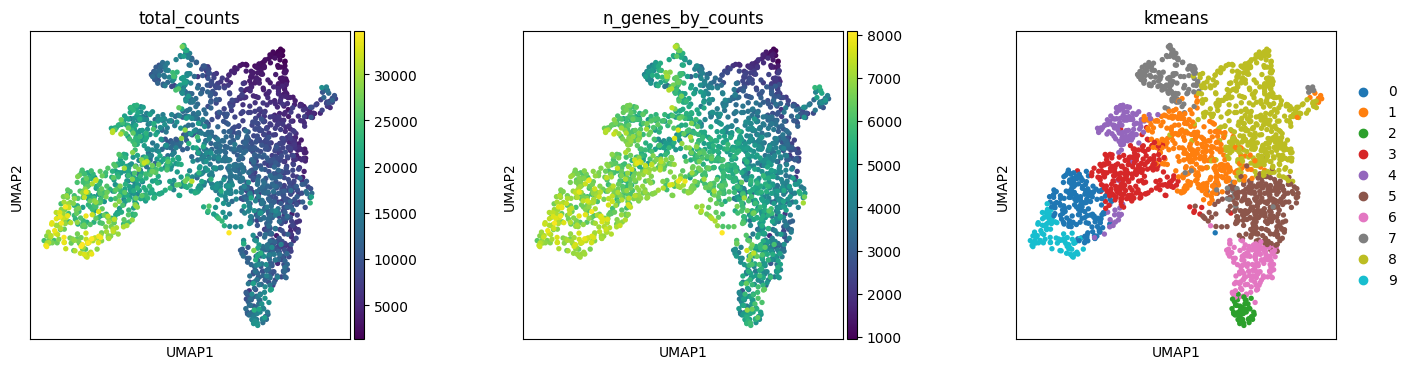

In [ ]:
#Plotting the clusters of k-means Algorithms
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "kmeans"], wspace=0.4)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


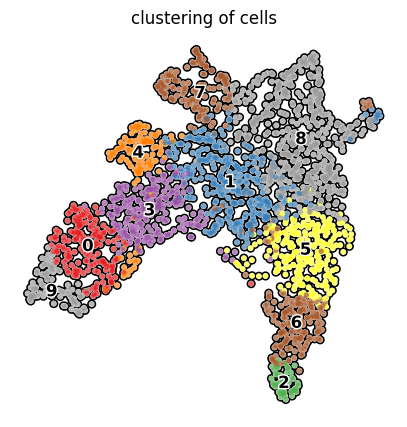

In [ ]:
#With rc_context plotting the clustering of cells using kmeans
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='kmeans', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Creating new adata with the kmeans clustering for marker genes
adata4 = adata

In [ ]:
#Using the wilcoxon method and leiden finding out the marker genes from adata
sc.tl.rank_genes_groups(adata4, 'kmeans', method='wilcoxon')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsKM = adata4.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outKM = np.array([[0,0,0,0,0]])
for group in resultsKM['names'].dtype.names:
    outKM = np.vstack((outKM, np.vstack((resultsKM['names'][group],
                                     resultsKM['scores'][group],
                                     resultsKM['pvals_adj'][group],
                                     resultsKM['logfoldchanges'][group],
                                     np.array([group] * len(resultsKM['names'][group])).astype('object'))).T))



markersKM = pd.DataFrame(outKM[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersKM = markersKM[(markersKM.pval_adj < 0.05) & (abs(markersKM.lfc) > 1)]

In [ ]:
#Printing the marker genes from louvain
markersKM

Gene     scores pval_adj         lfc cluster
0          MUCL1  19.822681      0.0         inf       0
1         CRABP2   19.12187      0.0   29.529755       0
2          AZGP1  18.979589      0.0  312.382141       0
3            DBI  18.914711      0.0   36.789906       0
4       KIAA1324  18.863316      0.0   19.881172       0
...          ...        ...      ...         ...     ...
165195       VIM  -9.677025      0.0  -15.024841       9
165196    COL1A1  -9.712481      0.0  -86.110573       9
165197    COL6A3  -9.775074      0.0   -12.03125       9
165198       DCN  -9.823406      0.0  -14.683624       9
165199    COL3A1   -9.94889      0.0  -51.811092       9

[45253 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using Louvain
pd.DataFrame(adata4.uns['rank_genes_groups']['names']).head(20000)

0        1         2         3         4       5       6  \
0         MUCL1    SPARC      IGKC      LY6E      FTH1    IGKC    IGKC   
1        CRABP2   IGFBP7      MZB1      CD24       MGP  JCHAIN   IGHG1   
2         AZGP1    POSTN     IGHG2       APP    GPRC5A   IGHG2  JCHAIN   
3           DBI   COL1A1    JCHAIN     AZGP1    PABPC1   IGHG1   IGHG2   
4      KIAA1324   COL1A2     IGHG1  LGALS3BP       CLU     DCN   IGHA1   
...         ...      ...       ...       ...       ...     ...     ...   
16515    COL1A1     LNX2  KIAA1324    COL3A1  SERPINF1   KRT18   CSF3R   
16516      MMP2   ABCC11   S100A14      CTSK      MMP2    MAL2    KRT7   
16517       VIM     FN3K    CRABP2      MMP2      IGKC    SDC4   MED24   
16518       DCN   TENT5C       JUP     SFRP4       DCN  PLAAT3   ACSL3   
16519    COL6A3  SELENOP    SPINT1       DCN    COL3A1    FTH1    ST14   

             7       8       9  
0          FTL     OGN   MUCL1  
1        APOC1     DPT     DBI  
2         APOE   SFRP4    APOD  
3         CTSD    PODN  CRABP2  
4        IFI30   PTGIS   SERF2  
...        ...     ...     ...  
16515     SOD3     B2M     VIM  
16516    CLDN3    OAZ1  COL1A1  
16517      CLU    ACTB  COL6A3  
16518     XBP1  TMSB4X     DCN  
16519  SELENOP     UBC  COL3A1  

[16520 rows x 10 columns]

#HClust

In [ ]:
#Importing Hierarchical Cluster Analysis libraries
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Training the pca components of the data and adding to the dataset
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
adata.obs['hclust_10'] = cluster.fit_predict(X_pca).astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


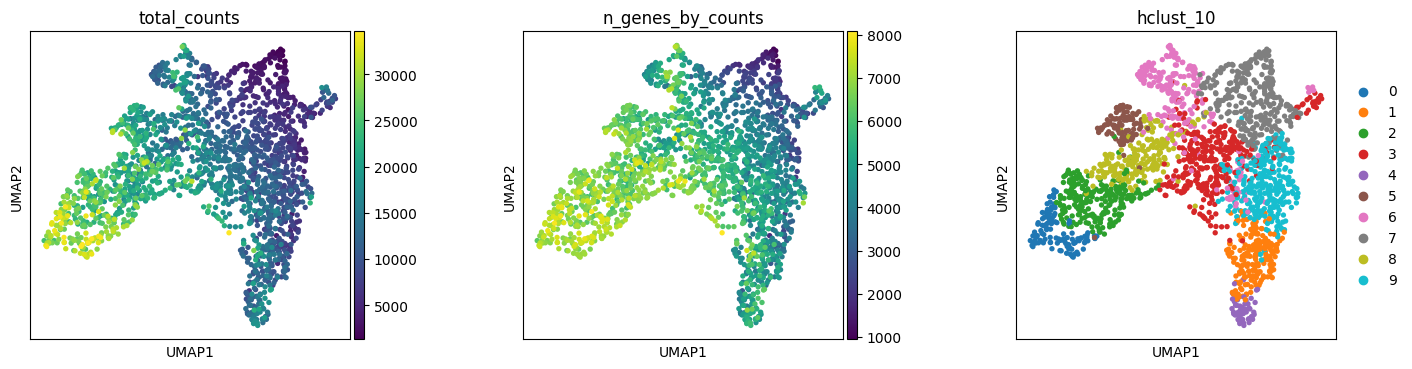

In [ ]:
#Plotting the clusters of h-clust Algorithms
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "hclust_10"], wspace=0.4)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


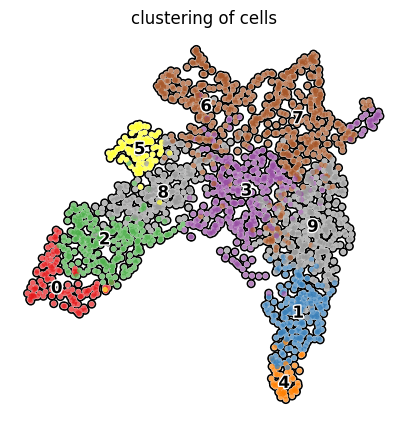

In [ ]:
#With rc_context plotting the clustering of cells using hclust
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='hclust_10', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Creating new adata with the hclust clustering for marker genes
adata5 = adata

In [ ]:
#Using the wilcoxon method and hclust finding out the marker genes from adata
sc.tl.rank_genes_groups(adata5, 'hclust_10', method='wilcoxon')

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsHC = adata5.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outHC = np.array([[0,0,0,0,0]])
for group in resultsHC['names'].dtype.names:
    outHC = np.vstack((outHC, np.vstack((resultsHC['names'][group],
                                     resultsHC['scores'][group],
                                     resultsHC['pvals_adj'][group],
                                     resultsHC['logfoldchanges'][group],
                                     np.array([group] * len(resultsHC['names'][group])).astype('object'))).T))



markersHC = pd.DataFrame(outHC[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersHC = markersHC[(markersHC.pval_adj < 0.05) & (abs(markersHC.lfc) > 1)]

In [ ]:
#Printing the marker genes from hclust
markersHC

Gene     scores pval_adj        lfc cluster
0         MUCL1  17.574512      0.0        inf       0
1           DBI  17.102007      0.0  55.684387       0
2        CRABP2  17.039995      0.0  41.942917       0
3          APOD  16.949926      0.0  54.860874       0
4         SERF2  16.836182      0.0  61.353592       0
...         ...        ...      ...        ...     ...
165195    NUPR1 -13.253856      0.0  -9.913604       9
165196  S100A11 -13.298392      0.0 -14.098856       9
165197   ARPC1B  -13.53167      0.0 -33.857925       9
165198     CSTB -14.353922      0.0 -11.719099       9
165199     FTH1 -15.088729      0.0 -206.66983       9

[46122 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using hclust
pd.DataFrame(adata5.uns['rank_genes_groups']['names']).head(20000)

0        1         2        3        4       5        6       7  \
0       MUCL1     IGKC     MUCL1    SPARC     IGKC    FTH1      FTL     OGN   
1         DBI    IGHG1      ASPH   IGFBP7    IGHG2     MGP    APOC1   SFRP1   
2      CRABP2   JCHAIN    CRABP2   COL1A1     MZB1  GPRC5A     CTSB  CHRDL1   
3        APOD    IGHG2       DBI   COL1A2   JCHAIN     CLU     APOE  ADAM33   
4       SERF2    IGHA1   PPP1R1A      LUM    IGHG1   DEFB1    IFI30     DPT   
...       ...      ...       ...      ...      ...     ...      ...     ...   
16515  COL6A3     ATG5       VIM     FN3K   SPINT1  COL6A1  SCGB1D2   UBA52   
16516  COL1A1    ACSL3    COL6A3  CYP27A1     THRA  COL6A3     XBP1     B2M   
16517     DCN     KRT7      MMP2  RARRES1  S100A14    IGKC     APOD  TMSB4X   
16518  COL3A1  TACSTD2       DCN     GLUL   CACNB3     DCN    MUCL1    ACTB   
16519     VIM  S100A11  SERPINF1     CTSD      JUP  COL3A1  SELENOP     UBC   

             8        9  
0         SLPI     IGKC  
1        RDH10    IGHG2  
2      PPP1R1B   JCHAIN  
3          LTF    IGHG1  
4           CP    SFRP4  
...        ...      ...  
16515   COL6A3    NUPR1  
16516    SFRP2  S100A11  
16517     MMP2   ARPC1B  
16518   COL3A1     CSTB  
16519      DCN     FTH1  

[16520 rows x 10 columns]

#Squidypy

In [ ]:
#Installing Squidpy
!pip install squidpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 122.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 40.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 103.6 M

In [ ]:
#Importing squidpy libraries
import scanpy as sc
import squidpy as sq

In [ ]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [ ]:
# nearest neighbor graph
sc.pp.neighbors(adata)
nn_graph_genes = adata.obsp["connectivities"]
# spatial proximity graph
sq.gr.spatial_neighbors(adata)
nn_graph_space = adata.obsp["spatial_connectivities"]

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [ ]:
#adding the two graphs and compute leiden on the joint graph
#weight the importance of each graph based on an hyperparameters alpha
alpha = 0.2
joint_graph = (1 - alpha) * nn_graph_genes + alpha * nn_graph_space
sc.tl.leiden(adata, adjacency=joint_graph, key_added="squidpy_domains")

running Leiden clustering
    finished: found 13 clusters and added
    'squidpy_domains', the cluster labels (adata.obs, categorical) (0:00:02)


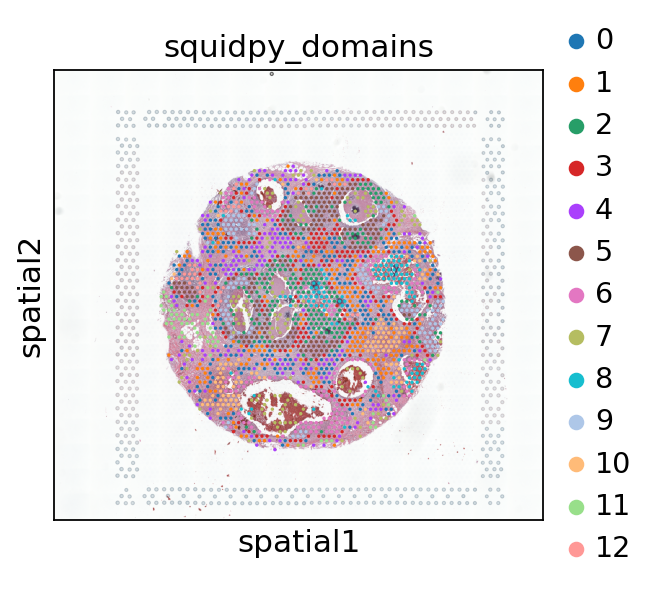

In [ ]:
##Plotting the adata with Squidpy
sq.pl.spatial_scatter(adata, color=["squidpy_domains"], wspace=0.9)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


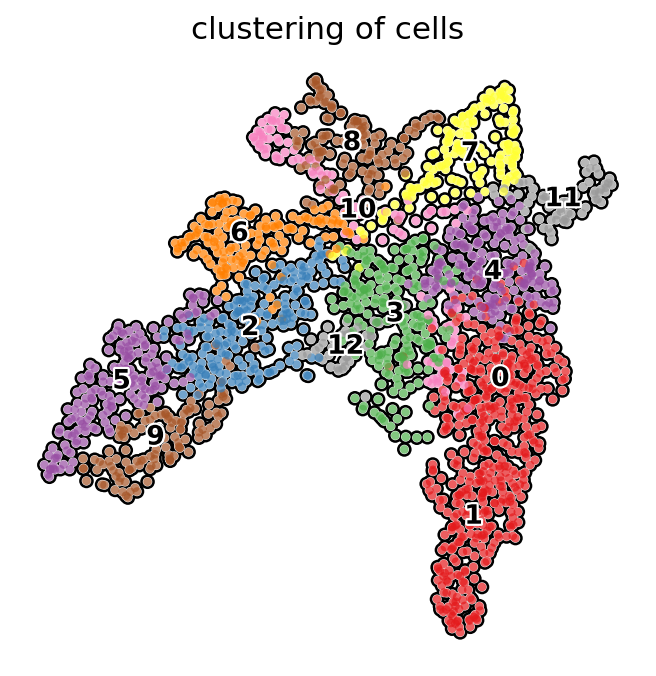

In [ ]:
#Plotting the clusters of Squidpy Algorithm
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata, color='squidpy_domains', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Creating new adata with the squidpy for marker genes
adata6 = adata

In [ ]:
#Using the wilcoxon method and squidpy to finding out the marker genes from adata
sc.tl.rank_genes_groups(adata6, 'squidpy_domains', method='wilcoxon')

ranking genes


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsSP = adata6.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outSP = np.array([[0,0,0,0,0]])
for group in resultsSP['names'].dtype.names:
    outSP = np.vstack((outSP, np.vstack((resultsSP['names'][group],
                                     resultsSP['scores'][group],
                                     resultsSP['pvals_adj'][group],
                                     resultsSP['logfoldchanges'][group],
                                     np.array([group] * len(resultsSP['names'][group])).astype('object'))).T))



markersSP = pd.DataFrame(outSP[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersSP = markersSP[(markersSP.pval_adj < 0.05) & (abs(markersSP.lfc) > 1)]

In [ ]:
#Printing the marker genes from squidpy
markersSP

Gene     scores  pval_adj         lfc cluster
0         IGKC   17.13047       0.0  195.774551       0
1       JCHAIN  15.192079       0.0   10.052146       0
2        IGHG2  14.113203       0.0   80.525841       0
3        IGHG1  13.591094       0.0   25.389275       0
4          DCN  13.298635       0.0   12.953162       0
...        ...        ...       ...         ...     ...
214755     AGT  -3.264435  0.008085    -3.05441      12
214756   SFRP4   -3.33768  0.006497   -3.518096      12
214757    SPP1  -3.452312  0.004555  -17.715504      12
214758    PODN  -3.490705  0.004038   -2.578653      12
214759   IGHG4   -4.69026  0.000047  -14.704614      12

[62259 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using squidpy
pd.DataFrame(adata6.uns['rank_genes_groups']['names']).head(20000)

0        1         2        3         4         5         6  \
0        IGKC     IGKC     AZGP1    SPARC     SFRP4  LGALS3BP    CAPN13   
1      JCHAIN    IGHG1      CD24   COL1A1    CCDC80      IFI6      FTH1   
2       IGHG2   JCHAIN       APP   IGFBP7      MMP2     MUCL1  SERPINA3   
3       IGHG1    IGHG2    ARPC1B   COL1A2     FBLN1    PLAAT4     DEFB1   
4         DCN    IGHA1       DBI      LUM      PODN      BST2       MGP   
...       ...      ...       ...      ...       ...       ...       ...   
16515   MGST1  TACSTD2  SERPINF1  CYP27A1  HSP90AA1    COL1A2  HLA-DPB1   
16516   NUPR1    MED24      MMP2   LGALS3      OAZ1    COL1A1       DCN   
16517    SDC4   CRABP2       C1S  RARRES1      FTH1    COL3A1    JCHAIN   
16518    CSTB     KRT7     SFRP4     FN3K      CSTB       DCN      MMP2   
16519    FTH1  S100A11       DCN     CTSD   S100A11    COL6A3      IGKC   

            7         8        9     10      11     12  
0      IGSF21       FTL     FTH1    FTL  COL3A1   CD74  
1       CXCL5      SPP1     ASPH   PSAP  COL1A2  CXCL9  
2      ADIPOQ     APOC1  SELENOP   APOE  COL1A1  HLA-F  
3        PAX8      CTSL  TMEM258  APOC1     LUM   PFN1  
4      FAM13C      APOE      MIF   CTSB   SPARC  COTL1  
...       ...       ...      ...    ...     ...    ...  
16515   UBA52    COL3A1   COL1A1  ERBB2  S100A9    AGT  
16516    PSAP       DCN   COL1A2   MAL2   AZGP1  SFRP4  
16517    EEF2  SERPINF1      DCN    CLU   ERBB2   SPP1  
16518    ACTB       C1R   COL3A1  MUCL1    FTH1   PODN  
16519     UBC   SELENOP      VIM  AZGP1    XBP1  IGHG4  

[16520 rows x 13 columns]

#SpaGCN

In [ ]:
#Installing spaGCN
!pip install SpaGCN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 98.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of python-igraph to determine which version is compatible with other requirements. This could take a while.


In [ ]:
#Importing libraries
import PIL

In [ ]:
#defining pixel values of the histological image of the spatial dataset
PIL.Image.MAX_IMAGE_PIXELS = 933120000

In [ ]:
#Importing libraries
import SpaGCN as spg
from PIL import Image
import requests

In [ ]:
#creating an array with the image pixel
img = np.asarray(
    Image.open(
            "/content/drive/MyDrive/breastcancer/Visium_FFPE_Human_Breast_Cancer_image.tif",
    )
)

In [ ]:
#Creating new adata
adata7=adata

In [ ]:
#Setting the coordinates
x_array = adata7.obs["array_row"].tolist()
y_array = adata7.obs["array_col"].tolist()
x_pixel = (adata7.obsm["spatial"][:, 0]).tolist()
y_pixel = adata7.obsm["spatial"][:, 1].tolist()

In [ ]:
#Calculating the adjacent matrix
adj = spg.calculate_adj_matrix(
    x=x_pixel,
    y=y_pixel,
    x_pixel=x_pixel,
    y_pixel=y_pixel,
    image=img,
    beta=55,
    alpha=1,
    histology=True,
)

Calculateing adj matrix using histology image...
Var of c0,c1,c2 =  663.8340898105193 1596.0476569769282 1227.9434657407141
Var of x,y,z =  15302863.29857606 14867458.603318876 15302863.298576063


In [ ]:
#making the var names unique for the new data
adata7.var_names_make_unique()

In [ ]:
#filtering the spatial genes with cell=5
sc.pp.filter_genes(adata7, min_cells=5)

In [ ]:
#finding mitochondrial (MT) genes though the dataset doesn't have any
adata.var["MT_gene"] = [gene.startswith("MT-") for gene in adata.var_names]
#removing MT genes (keeping their counts in the object)
adata.obsm["MT"] = adata[:, adata.var["MT_gene"].values].X.toarray()
adata = adata[:, ~adata.var["MT_gene"].values].copy()

In [ ]:
#Normalizing and taking log for UMI
sc.pp.normalize_total(adata7)
sc.pp.log1p(adata7)

In [ ]:
p = 0.5
#Finding the l value given p
l = spg.search_l(p, adj)

Run 1: l [0.01, 1000], p [0.0, 19.033980761040517]
Run 2: l [0.01, 500.005], p [0.0, 3.2943787574768066]
Run 3: l [250.0075, 500.005], p [0.4857804775238037, 3.2943787574768066]
Run 4: l [250.0075, 375.00625], p [0.4857804775238037, 1.5405621528625488]
Run 5: l [250.0075, 312.50687500000004], p [0.4857804775238037, 0.9321990013122559]
Run 6: l [250.0075, 281.2571875], p [0.4857804775238037, 0.6895501613616943]
Run 7: l [250.0075, 265.63234375], p [0.4857804775238037, 0.582908034324646]
Run 8: l [250.0075, 257.819921875], p [0.4857804775238037, 0.5331681966781616]
recommended l =  253.91371093749999


In [ ]:
#Searching for suitable resolution
res = spg.search_res(adata7, adj, l, target_num=15)

Start at res =  0.4 step =  0.1
Initializing cluster centers with louvain, resolution =  0.4
Epoch  0
Res =  0.4 Num of clusters =  6
Initializing cluster centers with louvain, resolution =  0.5
Epoch  0
Res =  0.5 Num of clusters =  8
Res changed to 0.5
Initializing cluster centers with louvain, resolution =  0.6
Epoch  0
Res =  0.6 Num of clusters =  9
Res changed to 0.6
Initializing cluster centers with louvain, resolution =  0.7
Epoch  0
Res =  0.7 Num of clusters =  10
Res changed to 0.7
Initializing cluster centers with louvain, resolution =  0.7999999999999999
Epoch  0
Res =  0.7999999999999999 Num of clusters =  12
Res changed to 0.7999999999999999
Initializing cluster centers with louvain, resolution =  0.8999999999999999
Epoch  0
Res =  0.8999999999999999 Num of clusters =  12
Res changed to 0.8999999999999999
Initializing cluster centers with louvain, resolution =  0.9999999999999999
Epoch  0
Res =  0.9999999999999999 Num of clusters =  13
Res changed to 0.9999999999999999
I

In [ ]:
#setting up spaGCN model
model = spg.SpaGCN()
model.set_l(l)

In [ ]:
#Training the model
model.train(adata7, adj, res=res)

Initializing cluster centers with louvain, resolution =  1.2
Epoch  0
Epoch  10
Epoch  20
Epoch  30
Epoch  40
Epoch  50
Epoch  60
Epoch  70
delta_label  0.000996512207274539 < tol  0.001
Reach tolerance threshold. Stopping training.
Total epoch: 70


In [ ]:
#Predicting using the model
y_pred, prob = model.predict()

In [ ]:
#adding the new spaGCN domain to the anndata
adata7.obs["spaGCN_domains"] = y_pred
adata7.obs["spaGCN_domains"] = adata7.obs["spaGCN_domains"].astype("category")

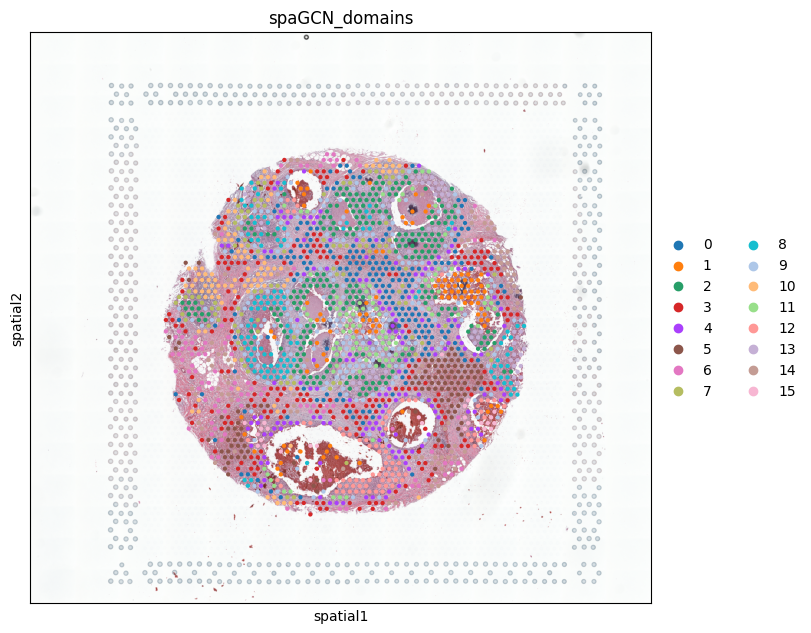

In [ ]:
#plotting the spaGCN domain
sq.pl.spatial_scatter(adata7, color=["spaGCN_domains"])

In [ ]:
#Calculateing adj matrix using xy only
adj_2d = spg.calculate_adj_matrix(x=x_array, y=y_array, histology=False)

Calculateing adj matrix using xy only...


In [ ]:
#Creating a category of in the anndata
adata7.obs["spaGCN_domains"] = adata7.obs["spaGCN_domains"].astype(
    "category"
)

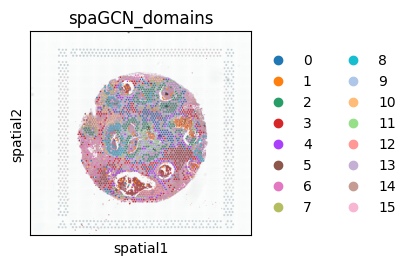

In [ ]:
#replotting the spaGCN domain
sq.pl.spatial_scatter(adata7, color=["spaGCN_domains"])

In [ ]:
#Principal Component Analysis of the adata
sc.pp.pca(adata7)
#compute the neighborhood graph of cells using the PCA representation of the adata matrix
sc.pp.neighbors(adata7)
#embedding the graph in two dimensions using UMAP
sc.tl.umap(adata7)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


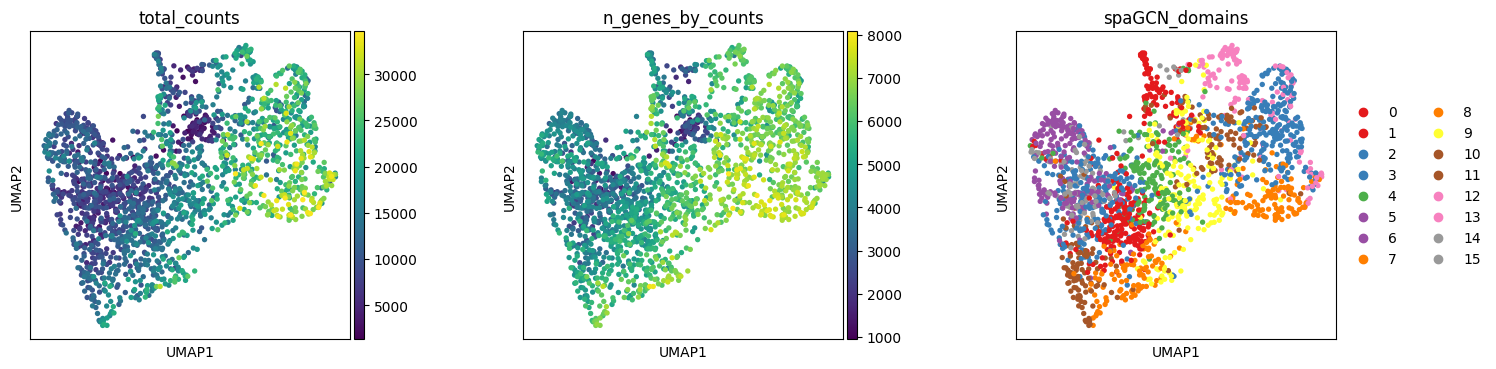

In [ ]:
#Plotting the clusters of spaGCN Algorithms
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata7, color=["total_counts", "n_genes_by_counts", "spaGCN_domains"], wspace=0.4)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


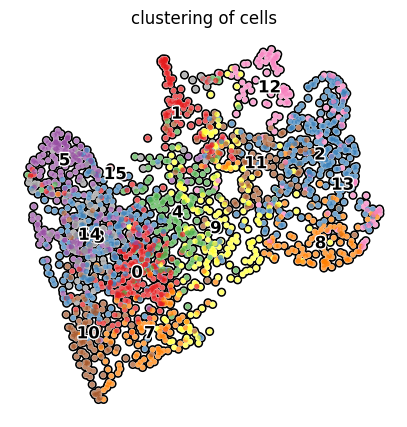

In [ ]:
#Plotting the clusters of spaGCN Algorithm
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(adata7, color='spaGCN_domains', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [ ]:
#Using the wilcoxon method and spaGCN to finding out the marker genes from adata
sc.tl.rank_genes_groups(adata7, 'spaGCN_domains', method='wilcoxon')

In [ ]:
#Coverting the dataframe with matrices to find out the marker genes
resultsSPG = adata7.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

outSPG = np.array([[0,0,0,0,0]])
for group in resultsSPG['names'].dtype.names:
    outSPG = np.vstack((outSPG, np.vstack((resultsSPG['names'][group],
                                     resultsSPG['scores'][group],
                                     resultsSPG['pvals_adj'][group],
                                     resultsSPG['logfoldchanges'][group],
                                     np.array([group] * len(resultsSPG['names'][group])).astype('object'))).T))



markersSPG = pd.DataFrame(outSPG[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markersSPG = markersSPG[(markersSPG.pval_adj < 0.05) & (abs(markersSPG.lfc) > 1)]

In [ ]:
#Printing the marker genes from spaGCN
markersSPG

Gene    scores  pval_adj       lfc cluster
10        CCL19  9.816321       0.0  1.149236       0
24        MFAP4  8.983504       0.0  1.024099       0
32         CPA3  8.699857       0.0  1.653927       0
48         MZB1  7.791693       0.0  1.006623       0
55          BOC  7.667023       0.0  1.098935       0
...         ...       ...       ...       ...     ...
250923  TMEM159  -4.97678  0.000158  -2.22637      15
250924    FADS2 -5.016517  0.000134 -2.780186      15
250925   DNAJB9 -5.149684  0.000074 -3.843885      15
250926   PLXNB1  -5.16594  0.000071 -3.290245      15
250927     RGL2 -5.363474  0.000031 -2.027933      15

[12685 rows x 5 columns]

In [ ]:
#Checking the total number of marker genes per group using spaGCN
pd.DataFrame(adata7.uns['rank_genes_groups']['names']).head(20000)

0       1        2        3        4      5        6       7  \
0       JCHAIN    SPP1     SLPI   COL6A3    TIMP3   APOE   COL3A1    CCL5   
1        SFRP4    CTSD    AZGP1      C1R    ACTA2   PSAP   COL1A2    TRAC   
2        IGLC1   PLIN2  TACSTD2      DCN    TAGLN   CTSD   COL1A1   CXCL9   
3        IGHG1   IFI30     CD24   COL3A1  COL10A1   GLUL    SPARC   TRBC2   
4        IGHG4     FTL    CLDN3   COL1A2   COL4A1    FTL      DCN   TRBC1   
...        ...     ...      ...      ...      ...    ...      ...     ...   
15678    PSMD3     OAF    SPARC     KRT8     LY6E   KRT8     KRT7   PPDPF   
15679   WDR45B   PRRX1   COL1A1    PITX1      MX1   MAL2    FOXA1  ARPC1B   
15680    MIEN1   MFAP4   COL3A1   SPINT2    HLA-C   CD24     ELF3    DDX5   
15681     CSTB    GGT5   COL1A2  TACSTD2      B2M  ERBB2    KCNS3    FTH1   
15682  S100A11  CERCAM      VIM     MAL2     IFI6  AZGP1  SERINC2  PABPC1   

             8       9      10       11        12      13        14       15  
0      PPP1R1A    KRT5    TRAC      FGB       AGT   TPD52       DCN     CTSL  
1        GATA3    CST1   TRBC2      FGG    CAPN13   LLGL2    COL3A1      FTL  
2        FADS2  S100A2    IL7R       CP        CP    MAL2    COL1A1     CTSD  
3         ASPH   SPRY4   CXCR4  RARRES1     DEFB1   ERBB2       C1R    APOC1  
4        TRPS1     KDR   CCL19   CAPN13       LTF   AZGP1    COL1A2     PSAP  
...        ...     ...     ...      ...       ...     ...       ...      ...  
15678      FOS  TMSB4X    CD24     CD74      CD74  COL1A2     FOXA1  TMEM159  
15679      VIM   UBA52  ARPC1A      UBC  HLA-DPB1     VIM    TFAP2B    FADS2  
15680     PSAP     B2M  ARPC1B      C1S   HLA-DRA  COL3A1      ELF3   DNAJB9  
15681     CTSB  SQSTM1    ASPH       C3      IGKC    CD74  KIAA1324   PLXNB1  
15682      FTL     UBC   ERBB2      C1R     CXCR4  COL1A1     EFHD1     RGL2  

[15683 rows x 16 columns]

In [ ]:
#visualizing clustered samples in spatial dimensions using Leiden
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

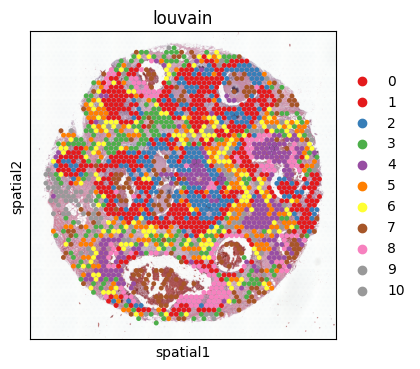

In [ ]:
#visualizing clustered samples in spatial dimensions using louvain
sc.pl.spatial(adata, img_key="hires", color="louvain", size=1.5)

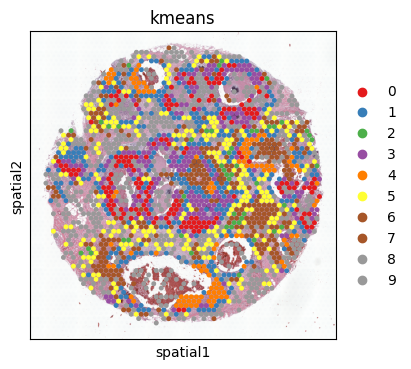

In [ ]:
#visualizing clustered samples in spatial dimensions using kmeans
sc.pl.spatial(adata, img_key="hires", color="kmeans", size=1.5)

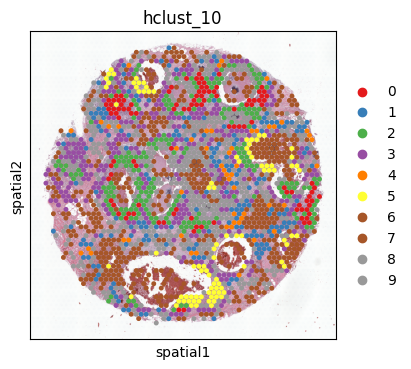

In [ ]:
#visualizing clustered samples in spatial dimensions using hclust
sc.pl.spatial(adata, img_key="hires", color="hclust_10", size=1.5)

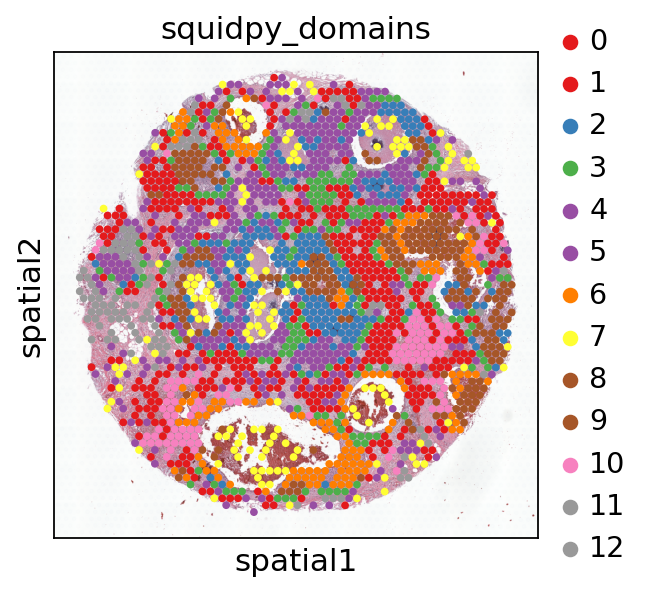

In [ ]:
#visualizing clustered samples in spatial dimensions using squidpy
sc.pl.spatial(adata, img_key="hires", color="squidpy_domains", size=1.5)

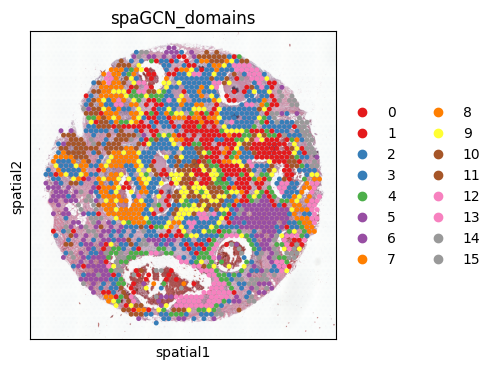

In [ ]:
#visualizing clustered samples in spatial dimensions using spaGCN
sc.pl.spatial(adata, img_key="hires", color="spaGCN_domains", size=1.5)